In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [166]:
dataset = pd.read_csv('LDA_data.csv', index_col=0).values

分出两个类别

In [167]:
c1 = []
c2 = []
for row in dataset:
    if row[-1] == 1:
        c1.append(row[:-1])
    else:
        c2.append(row[:-1])
        
c1, c2 = np.array(c1), np.array(c2)

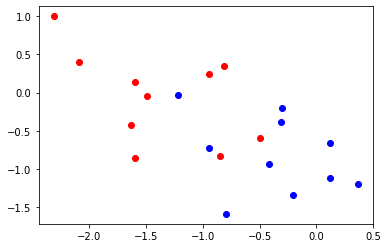

In [168]:
plt.scatter(c1.T[0], c1.T[1], c='r')
plt.scatter(c2.T[0], c2.T[1], c='b')

## LDA 的解

设 $\mu_1, \mu_2$ 为两个类别的均值，$\Sigma_1, \Sigma_2$ 为两个类别的协方差矩阵，则 LDA 的解为：

$$
w = (\Sigma_1 + \Sigma_2)^{-1} (\mu_1 - \mu_2)
$$

In [169]:
mu1, mu2 = np.mean(c1, axis=0), np.mean(c2, axis=0)
S_1, S_2 = np.cov(c1.T), np.cov(c2.T)

In [170]:
w = np.linalg.inv(S_1 + S_2) @ (mu1 - mu2)
w = np.reshape(w / np.linalg.norm(w), (-1, 1))
w

array([[-0.92064833],
       [ 0.39039295]])

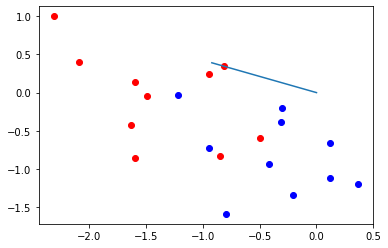

In [171]:
plt.scatter(c1.T[0], c1.T[1], c='r')
plt.scatter(c2.T[0], c2.T[1], c='b')
# Display the axis of the projection
prj = np.concatenate([np.zeros_like(w), w], axis=1)
plt.plot(prj[0], prj[1])

In [172]:
new_c1 = c1 @ w; new_c2 = c2 @ w

In [173]:
new_c1, new_c2

(array([[0.45668571],
        [2.51771585],
        [1.33139513],
        [2.08200039],
        [0.8849468 ],
        [1.35170084],
        [1.13480924],
        [0.22133318],
        [0.96388312],
        [1.52604755]]),
 array([[-0.36653828],
        [ 0.58334954],
        [ 1.11128642],
        [ 0.13725006],
        [-0.54879061],
        [ 0.19658858],
        [ 0.01731124],
        [-0.33536361],
        [-0.80558544],
        [ 0.11109446]]))

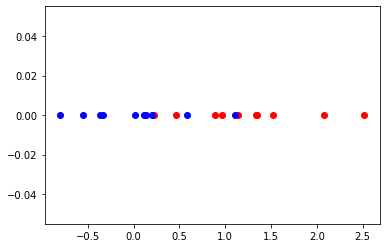

In [174]:
plt.scatter(new_c1, np.zeros_like(new_c1), c='r')
plt.scatter(new_c2, np.zeros_like(new_c2), c='b')